In [21]:
# EacyOCR 사용하기
from easyocr import Reader
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import numpy as np

In [22]:
def display(img, cmap='gray'):
    # fig = plt.figure(figsize=(11.69,8.27)) # A4 사이즈
    fig = plt.figure(figsize=(16.53, 11.69))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

def write_text(img, text, x, y, font, color=(50, 50, 255), font_size=70):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font = font, fill=color)
    img = np.array(img_pil)
    return img

# Bouding Box
#   - lt: left top
#   - rt: right top
#   - br: bottom right
#   - bl: bottom left
def box_coordinates(box):
    (lt, rt, br, bl) = box
    lt = (int(lt[0]), int(lt[1]))
    rt = (int(rt[0]), int(rt[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    return lt, rt, br, bl

def draw_img(img, lt, br, color=(0, 255, 200), thickness=2):
    cv2.rectangle(img, lt, br, color, thickness)
    return img

In [23]:
languages_list = ['en', 'ko']
gpu = True

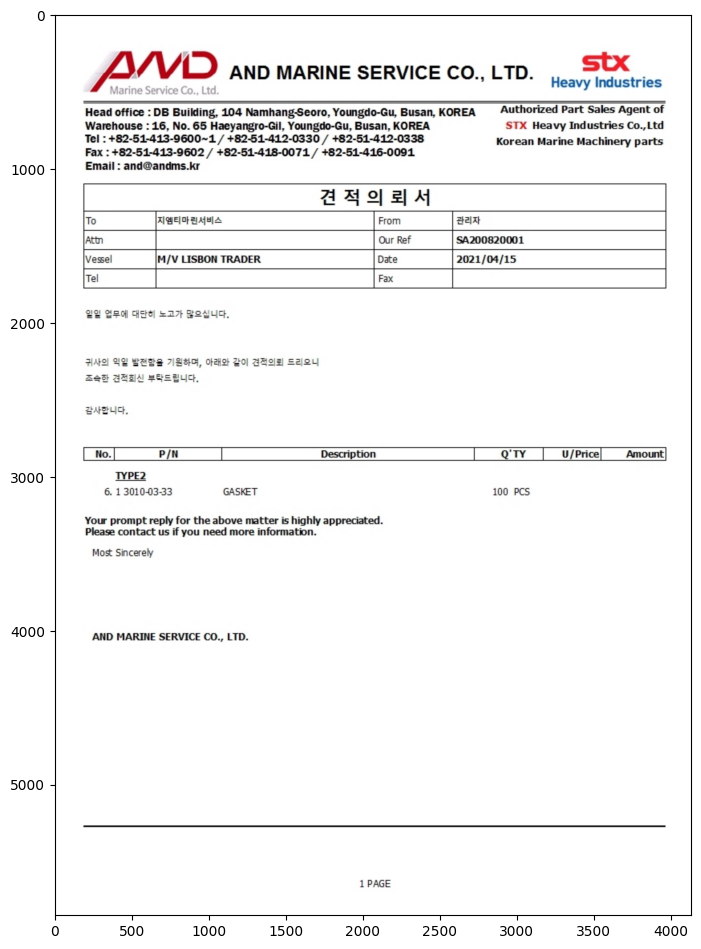

In [24]:
img = cv2.imread('./OCR_with_Python/Pdfs/IMGAND_SA200820001_REQ.0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

In [25]:
reader = Reader(languages_list, gpu)
results = reader.readtext(img)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [26]:
font = './OCR_with_Python/Fonts/NanumSquareR.ttf'

[[304, 190], [1082, 190], [1082, 470], [304, 470]] DD 0.21900669970431322
[[1125, 305], [3105, 305], [3105, 458], [1125, 458]] AND MARINE SERVICE CO , LTD. 0.5937752520516015
[[3401, 223], [3758, 223], [3758, 399], [3401, 399]] stx 0.9538346956071571
[[3203, 387], [3958, 387], [3958, 514], [3203, 514]] Heavy Industries 0.6909600101618109
[[350, 455], [814, 455], [814, 536], [350, 536]] Marine Service 0.9984541090641528
[[939, 455], [1066, 455], [1066, 536], [939, 536]] Ltd 0.9993708236621954
[[190, 601], [590, 601], [590, 677], [190, 677]] Head office 0.9995003386098497
[[630, 586], [2746, 586], [2746, 698], [630, 698]] DB Building 104 Namhang-Seoro, Youngdo-Gu Busan KOREA 0.96136793196885
[[2884, 576], [3969, 576], [3969, 673], [2884, 673]] Authorzzed Part Sales Agent of 0.6397856183147186
[[188, 683], [583, 683], [583, 772], [188, 772]] Warehouse 0.9999958276705136
[[618, 685], [2448, 685], [2448, 785], [618, 785]] 16, No.65 Haeyangro-Gil, Youngdo-Gu, Busan, KOREA 0.8634876877203088


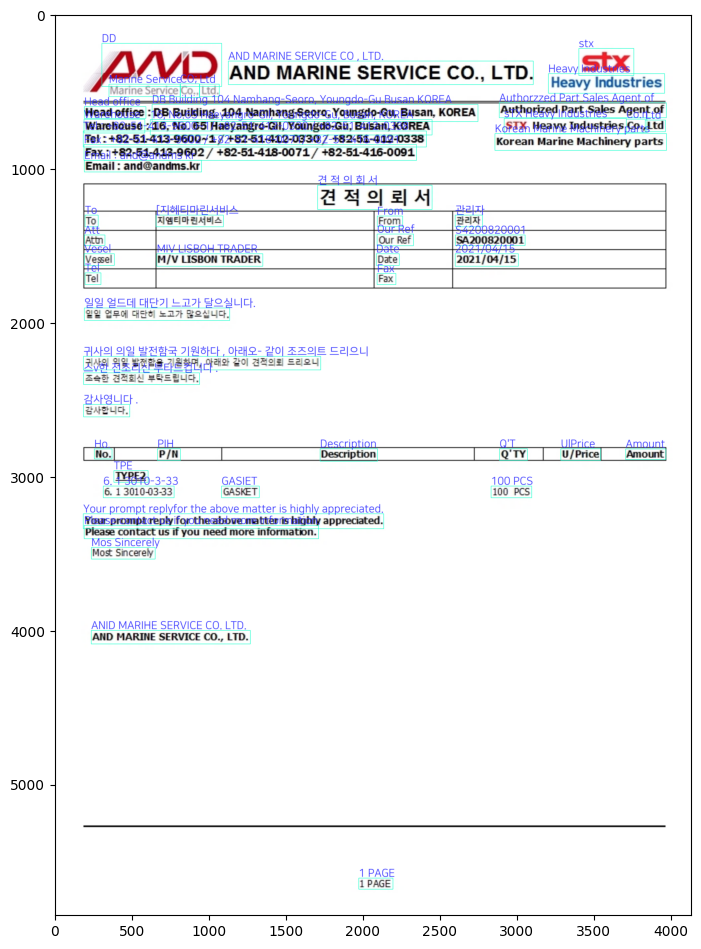

In [27]:
img_copy = img.copy()

for (box, text, probability) in results:
    print(box, text, probability)
    lt, rt, br, bl = box_coordinates(box)
    img_copy = draw_img(img_copy, lt, br)
    img_copy = write_text(img_copy, text, lt[0], lt[1], font)
display(img_copy)